# ASSIGNMENT 8
# **APPROACH 1 - TIME SERIES SPLIT**



This assignment focuses on implementing and comparing three primary Ensemble Learning techniques - Bagging, Boosting, and Stacking on a bike-sharing demand regression problem. The core objective is to demonstrate how these methods effectively manage the bias-variance trade-off to achieve superior predictive accuracy (lowest RMSE) compared to single baseline models.

#**Part A) 1 & 2) Data loading, feature engineering and train-test split**




Pre-processing on dataset is performed:

1. **Load dataset**
   - hour.csv from Google Drive; features include time, weather, and bike rentals (`cnt`).

2. **Drop irrelevant columns**
   - Removed `instant`, `dteday`, `casual`, `registered`; remaining columns are predictors + target.

3. **Check missing values**
   - None found; dataset is clean.

4. **Feature engineering**
   - One-Hot Encoding for categorical features (`season`, `weathersit`, `mnth`, `hr`, `weekday`), `drop_first=True`.
   - Result: 53 features (`X`), 1 target (`y`).

5. **Define features & target**
   - `X` = all columns except `cnt`, `y` = `cnt`.

6. **Time-based train-test split**
   - First 80% → training (13,903 samples), last 20% → testing (3,476 samples).
   - Preserves chronological order to avoid future data leakage.

## **Why was time-series split used?**

- This is temporal data: each row corresponds to a specific hour in chronological order.

- Using random splitting could mix future hours into the training set, causing data leakage.

A time series split ensures:

- Model only sees past data for training.

- Predictions are made on future hours, like in real-world forecasting.

- This is especially important for demand forecasting, where previous hour/day/month patterns influence future rentals.



In [20]:
import pandas as pd
import numpy as np
from IPython.display import display

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/bike+sharing+dataset/hour.csv'
df = pd.read_csv(file_path)

print("Dataset Loaded Successfully!")
print("Shape of the data:", df.shape)
display(df.head())

df = df.drop(columns=['instant', 'dteday', 'casual', 'registered'])

print("\nRemaining columns after dropping irrelevant ones:")
print(df.columns.tolist())
print("\nMissing values per column:")
print(df.isnull().sum())

categorical_features = ['season', 'weathersit', 'mnth', 'hr', 'weekday']

df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

print("\n One-Hot Encoding completed.")
print("Shape after encoding:", df.shape)
print("Columns now include:", len(df.columns), "features")
X = df.drop(columns=['cnt'])
y = df['cnt']

print("\nFeature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

split_index = int(0.8 * len(X))
X_train, X_test = X.iloc[:split_index, :], X.iloc[split_index:, :]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print("\n Time Series Split Done Successfully!")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

print("\nPreview of Training Features:")
display(X_train.head())

print("\nPreview of Training Target:")
display(y_train.head())

print("\n Preprocessing Summary:")
print(f"Total features after encoding: {X.shape[1]}")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")
print("Split is chronological ; no data leakage from the future.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Loaded Successfully!
Shape of the data: (17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1



Remaining columns after dropping irrelevant ones:
['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

Missing values per column:
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

 One-Hot Encoding completed.
Shape after encoding: (17379, 54)
Columns now include: 54 features

Feature matrix shape: (17379, 53)
Target vector shape: (17379,)

 Time Series Split Done Successfully!
Training set shape: (13903, 53)
Testing set shape: (3476, 53)

Preview of Training Features:


,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,hr_20,hr_21,hr_22,hr_23,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,0.24,0.2879,0.81,0.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0,0,0,0.22,0.2727,0.80,0.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0,0,0,0.22,0.2727,0.80,0.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,0.24,0.2879,0.75,0.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0,0,0,0.24,0.2879,0.75,0.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True



Preview of Training Target:


,cnt
0,16
1,40
2,32
3,13
4,1



 Preprocessing Summary:
Total features after encoding: 53
Training samples: 13903, Testing samples: 3476
Split is chronological ; no data leakage from the future.


## **Data - Inferences**

- We see that the model has 53 features.
- The 80:20 split leads to 13903 samples for training and 3476 for testing.
- The total number of samples is thus 17379.
- No missing values are found after the pre-processing


# **Part A 3) Baseline Model Evaluation**

Here the following models are evaluated for choosing the baseline:

- **Decision Tree Regressor:** A non-linear model that splits the feature space into regions based on feature values to make predictions. It can capture complex interactions but may overfit if not properly constrained.  

Here, we train a tree-based model with max_depth=6 on the training set, predicts on test data, and computes RMSE.  

- **Linear Regression:** A simple model that assumes a linear relationship between features and the target, predicting values as a weighted sum of input features. It works well when the underlying pattern is approximately linear.

Here, we train a linear model on the same data, predicts on test data, and computes RMSE.  

- **Baseline Selection:** We compare RMSEs of both models and select the one with lower RMSE as the baseline.  



 Decision Tree RMSE (max_depth=6): 158.87
📈 Linear Regression RMSE: 133.84

 Baseline Model: Linear Regression (RMSE = 133.84)


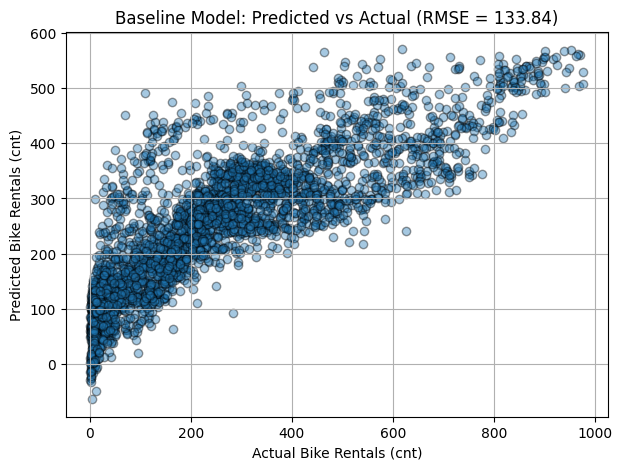

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

dt_model = DecisionTreeRegressor(max_depth=6, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f" Decision Tree RMSE (max_depth=6): {rmse_dt:.2f}")

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"📈 Linear Regression RMSE: {rmse_lr:.2f}")

if rmse_dt < rmse_lr:
    print(f"\n Baseline Model: Decision Tree Regressor (RMSE = {rmse_dt:.2f})")
    baseline_model = dt_model
    baseline_rmse = rmse_dt
else:
    print(f"\n Baseline Model: Linear Regression (RMSE = {rmse_lr:.2f})")
    baseline_model = lr_model
    baseline_rmse = rmse_lr

import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test, baseline_model.predict(X_test), alpha=0.4, edgecolors='k')
plt.xlabel("Actual Bike Rentals (cnt)")
plt.ylabel("Predicted Bike Rentals (cnt)")
plt.title(f"Baseline Model: Predicted vs Actual (RMSE = {baseline_rmse:.2f})")
plt.grid(True)
plt.show()

# **Baseline Model - Inference and Reasoning**

- **Inference:** Linear Regression outperformed the Decision Tree Regressor (RMSE = 133.84 vs 158.87).  

- **Reasoning:**  
  - Linear Regression assumes a linear relationship between features and the target. The bike sharing demand data may have mostly smooth trends over time (e.g., hourly, daily, seasonal patterns), which a linear model captures well.  
  - The Decision Tree, although flexible, can overfit to local variations and fail to generalize when limited to max_depth=6, resulting in higher RMSE.  
  - Trees excel at capturing non-linear interactions, but if the main signal is linear or the depth is constrained, they may underperform compared to a simple linear model.  

- **Conclusion:** For this dataset, a linear approximation is sufficient for baseline predictions, making Linear Regression a better starting point.

# **Part B) 1 & 2)** **Bagging and Gradient Boosting**

Here, we:
- Train two ensemble models — **Random Forest (Bagging)** and **Gradient Boosting Regressor (Boosting)** — on the bike sharing dataset.  
- Compute RMSE for each model and compares them along with the baseline models (Linear Regression and Decision Tree).  
- Visualize RMSEs using a horizontal bar chart and identify the best-performing model based on lowest RMSE.  

- **Bagging Regressor (Random Forest):**  
  - Stands for **Bootstrap Aggregating**.  
  - Creates multiple decision trees by training each on a random bootstrapped sample of the training data.  
  - Predictions from all trees are averaged to give the final prediction.  
  - Reduces **variance** of the model, making it more stable and less sensitive to noise in the training data.  
  - Works well for datasets where overfitting is a concern with single decision trees.  
  - We tesr the hypothesis that bagging reduces variance.

- **Gradient Boosting Regressor:**  
  - Builds trees **sequentially**, where each new tree tries to correct the residual errors of the previous trees.  
  - Combines the predictions of all trees using a weighted sum to improve accuracy.  
  - Focuses on reducing **bias**, allowing the model to capture complex patterns in the data.  
  - The **learning rate** controls how much each new tree contributes, balancing underfitting and overfitting.  
  - Highly effective for datasets with strong nonlinear relationships and temporal dependencies, like bike rental demand over hours/days.  
  - We test the hypothesis that gradient boosting reduces bias.


 Random Forest RMSE: 126.48
🔺 Gradient Boosting RMSE: 107.45

 Model Performance Comparison:


,Model,RMSE
3,Gradient Boosting,107.446442
2,Random Forest,126.484250
0,Linear Regression,133.835424
1,Decision Tree (Depth=6),158.874267


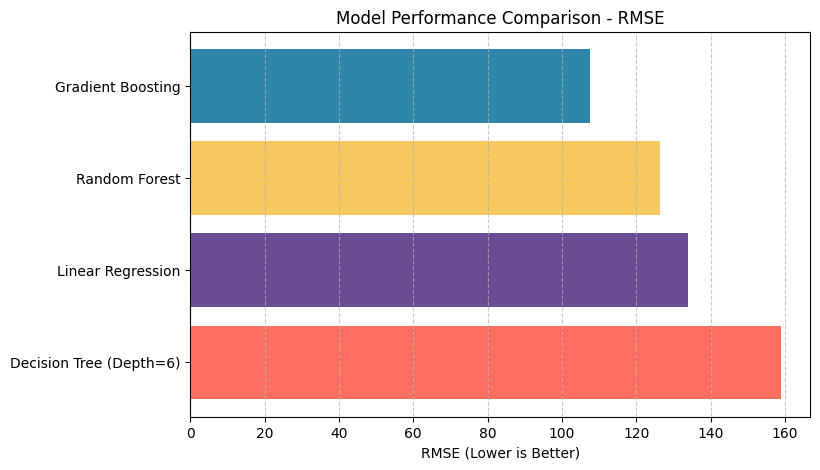


🏆 Best Model: Gradient Boosting (RMSE = 107.45)


In [22]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f" Random Forest RMSE: {rmse_rf:.2f}")

gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(f"🔺 Gradient Boosting RMSE: {rmse_gb:.2f}")

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree (Depth=6)', 'Random Forest', 'Gradient Boosting'],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf, rmse_gb]
}).sort_values(by='RMSE')

print("\n Model Performance Comparison:")
display(results)

plt.figure(figsize=(8, 5))
plt.barh(results['Model'], results['RMSE'], color=['#2E86AB', '#F6C85F', '#6A4C93', '#FF6F61'])
plt.xlabel("RMSE (Lower is Better)")
plt.title("Model Performance Comparison - RMSE")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

best_model_name = results.iloc[0]['Model']
best_model_rmse = results.iloc[0]['RMSE']

print(f"\n🏆 Best Model: {best_model_name} (RMSE = {best_model_rmse:.2f})")

# **Bagging and Gradient Boosting - Inferences**

##1. Bagging (Variance Reduction)

**Hypothesis:**  
Bagging primarily reduces **variance** by averaging predictions from multiple independent models, which stabilizes predictions and prevents overfitting.

**Implementation and Results:**  
- **Base Estimator:** Decision Tree Regressor (max_depth=6)  
- **Bagging Regressor:** Random Forest with 200 trees  
- **RMSE on Test Set:** 126.48  

**Discussion:**  
- The single Decision Tree baseline had an RMSE of **158.87**, whereas the Bagging Regressor (Random Forest) reduced the RMSE to **126.48**.  
- This demonstrates that bagging effectively **reduces variance**, as averaging over many trees mitigates the instability and overfitting seen in a single Decision Tree.  
- Bagging generates **multiple bootstrap samples** from the training data, trains a separate tree on each, and averages the predictions. This ensures that predictions are not overly influenced by noise or outliers in any single sample.  
- While variance is reduced, bagging **does not significantly reduce bias**. The base estimator (Decision Tree) still has limitations in capturing complex nonlinear relationships, which sets a lower bound on predictive accuracy.  

**Insight:**  
Bagging improves **stability and robustness** of predictions, making the model less sensitive to fluctuations in the training data. It is particularly useful when the base model is prone to overfitting.

---

## 2. Boosting (Bias Reduction)

**Hypothesis:**  
Boosting primarily reduces **bias** by sequentially building models that correct the errors of previous models, capturing complex patterns in the data.

**Implementation and Results:**  
- **Model:** Gradient Boosting Regressor  
- **Hyperparameters:** 200 estimators, learning_rate=0.05, max_depth=4  
- **RMSE on Test Set:** 107.45  

**Discussion:**  
- Gradient Boosting outperforms both the **single Decision Tree (RMSE = 158.87)** and the **Bagging ensemble (RMSE = 126.48)**.  
- Boosting builds trees **sequentially**, where each new tree focuses on the **residual errors** of the previous trees. This enables the model to progressively improve performance and **capture complex nonlinear relationships** in the dataset.  
- The lower RMSE indicates that boosting effectively **reduces bias** and better generalizes to unseen data, even though individual trees are weak learners.  
- Boosting is sensitive to overfitting if not properly tuned (e.g., learning rate, max_depth, number of estimators), but in this case, careful hyperparameter selection allowed significant improvement over both the baseline and bagging.  
- Boosting effectively complements bagging by addressing **underfitting**, while bagging primarily stabilizes predictions.

**Insight:**  
Boosting is particularly effective for datasets with complex patterns and dependencies. It reduces bias while still leveraging multiple weak learners to produce a strong overall predictor, achieving the best RMSE.

---

### Summary Table of Results

| Model                    | RMSE     | Targeted Effect           |
|---------------------------|----------|--------------------------|
| Decision Tree (Depth=6)   | 158.87  | Baseline (High Variance) |
| Bagging (Random Forest)   | 126.48  | Variance Reduction       |
| Gradient Boosting         | 107.45  | Bias Reduction           |

---

**Conclusion:**  
- **Bagging (Random Forest)** effectively reduces variance and improves prediction stability compared to a single Decision Tree, but its predictive power is limited by the bias of the base estimator.  
- **Boosting (Gradient Boosting)** sequentially reduces bias, capturing complex patterns and achieving the lowest RMSE.  
- **Comparison:** Bagging excels in variance reduction; boosting excels in bias reduction. Together, these methods highlight how different ensemble strategies address different aspects of prediction error.  
- For the Bike Sharing dataset, which exhibits temporal and nonlinear patterns, **boosting outperforms bagging** because it can model intricate dependencies that a single tree or bagged ensemble might miss.


# **Part C) 1 & 2) Stacking Regressor**

## **Principle of Stacking**:
Stacking (or Stacked Generalization) is an ensemble learning strategy
where multiple diverse models (called Base Learners) are trained on the
same dataset. Instead of averaging their predictions (as in Bagging or
Boosting), a second-level model, known as the Meta-Learner, is trained
to learn how to best combine their outputs.

## **How it works**:
1. Level-0 (Base Learners): Each base model captures different patterns.
   - KNN captures local similarities in data.
   - Bagging reduces variance using multiple Decision Trees.
   - Gradient Boosting reduces bias by focusing on difficult samples.

2. Level-1 (Meta Learner): **The Ridge Regression model takes the
   predictions from the base learners as input and learns optimal
   weights to minimize overall prediction error (RMSE). Ridge helps
   avoid overfitting through L2 regularization.**

## **Advantage**:
Stacking leverages the strengths of multiple algorithms (low bias from
Boosting, low variance from Bagging, and flexibility from KNN),
producing a more robust and accurate predictor.

## **Methodology here**

Here, we:
- Implement a **Stacking Regressor** to combine multiple base learners (Level-0 models) for optimal prediction.
- Use **feature scaling** (since it is important for KNN and Ridge), trains the stack using **5-fold cross-validation**, evaluates RMSE, and visualizes predicted vs actual bike rentals.
- The **meta-learner** (Ridge Regression) learns the best way to combine predictions from the base learners.

---

### **Level-0 Base Learners**
1. **K-Nearest Neighbors Regressor (KNN)**
   - Predicts a sample’s target by averaging the targets of its closest neighbors.
   - Captures **local patterns** in the data effectively.

2. **Bagging Regressor**
   - Combines multiple Decision Trees trained on bootstrapped subsets of data.
   - Reduces **variance** and improves stability of predictions.

3. **Gradient Boosting Regressor**
   - Builds trees sequentially where each tree corrects the errors of previous ones.
   - Reduces **bias** and improves predictive accuracy.

---

### **Level-1 Meta Learner**
- **Ridge Regression**
  - Takes predictions from the base learners as input.
  - Learns **optimal weights** to combine base predictions while avoiding overfitting (L2 regularization).




 Feature scaling completed successfully!

 Stacking Regressor trained successfully!

 Stacking Regressor RMSE on Test Set: 93.35


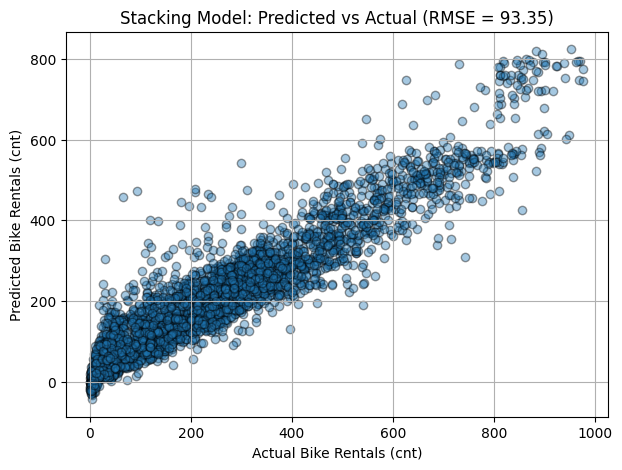


===== Model Summary =====
Base Learners (Level-0): KNN, Bagging, Gradient Boosting
Meta Learner (Level-1): Ridge Regression
Final Test RMSE (Stacking Regressor): 93.35


In [23]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(" Feature scaling completed successfully!")

knn_reg = KNeighborsRegressor(n_neighbors=5)
bagging_reg = BaggingRegressor(n_estimators=100, random_state=42)
gbr_reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)

ridge_meta = Ridge(alpha=1.0)

stack_model = StackingRegressor(
    estimators=[
        ('knn', knn_reg),
        ('bagging', bagging_reg),
        ('gbr', gbr_reg)
    ],
    final_estimator=ridge_meta,
    cv=5,        # 5-fold cross validation blending
    n_jobs=-1,
    passthrough=False
)
stack_model.fit(X_train_scaled, y_train)
print("\n Stacking Regressor trained successfully!")

y_pred_stack = stack_model.predict(X_test_scaled)
stack_rmse = sqrt(mean_squared_error(y_test, y_pred_stack))
print(f"\n Stacking Regressor RMSE on Test Set: {stack_rmse:.2f}")

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_stack, alpha=0.4, edgecolors='k')
plt.xlabel("Actual Bike Rentals (cnt)")
plt.ylabel("Predicted Bike Rentals (cnt)")
plt.title(f"Stacking Model: Predicted vs Actual (RMSE = {stack_rmse:.2f})")
plt.grid(True)
plt.show()

print("\n===== Model Summary =====")
print("Base Learners (Level-0): KNN, Bagging, Gradient Boosting")
print("Meta Learner (Level-1): Ridge Regression")
print(f"Final Test RMSE (Stacking Regressor): {stack_rmse:.2f}")

## **Brief Inference**

The Stacking Regressor achieved an RMSE of 93.35 on the test set, which is lower than all previous values, indicating that combining multiple base learners via a Ridge meta-learner improved prediction accuracy compared to individual models.

# **Part D) Final Evaluation**

The results from all models are tabulated and plotted.

 Model Performance Summary (RMSE)


,Model,RMSE
4,Stacking Regressor,93.350753
2,Gradient Boosting Regressor,107.446442
1,Bagging Regressor (Random Forest),126.484250
0,Baseline (Linear Regression),133.835424
3,Decision Tree Regressor,158.874267


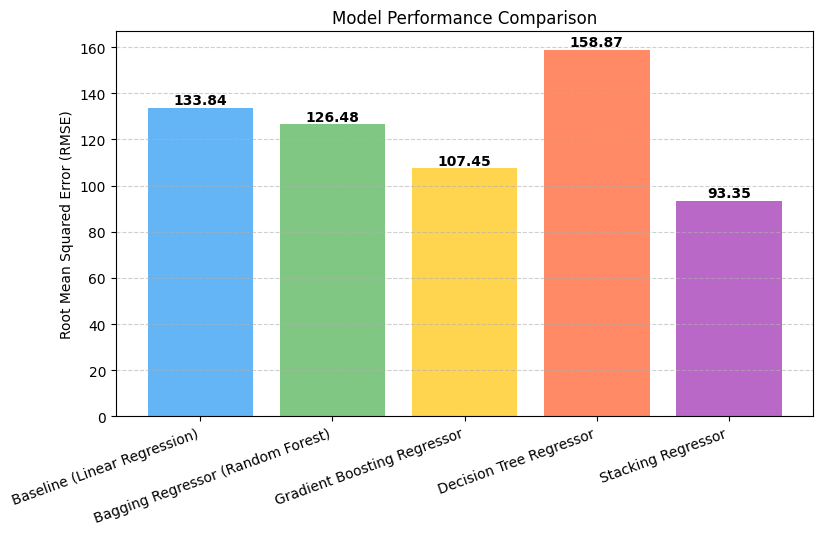

 Best Performing Model: Stacking Regressor (RMSE = 93.35)


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

best_baseline_rmse = min(rmse_dt, rmse_lr)
best_baseline_name = "Decision Tree Regressor" if rmse_dt < rmse_lr else "Linear Regression"

results_df = pd.DataFrame({
    "Model": [
        f"Baseline ({best_baseline_name})",
        "Bagging Regressor (Random Forest)",
        "Gradient Boosting Regressor",
        "Decision Tree Regressor",
        "Stacking Regressor"
    ],
    "RMSE": [
        best_baseline_rmse,
        rmse_rf,
        rmse_gb,
        rmse_dt,
        stack_rmse
    ]
})

print(" Model Performance Summary (RMSE)")
display(results_df.sort_values(by="RMSE"))

plt.figure(figsize=(9,5))
plt.bar(results_df["Model"], results_df["RMSE"], color=['#64B5F6','#81C784','#FFD54F','#FF8A65','#BA68C8'])
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Model Performance Comparison")
plt.xticks(rotation=20, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
for i, v in enumerate(results_df["RMSE"]):
    plt.text(i, v + 0.01 * max(results_df["RMSE"]), f"{v:.2f}", color='black', fontweight='bold', ha='center')
plt.show()

best_model_idx = results_df["RMSE"].idxmin()
best_model_name = results_df.loc[best_model_idx, "Model"]
best_model_rmse = results_df.loc[best_model_idx, "RMSE"]
print(f" Best Performing Model: {best_model_name} (RMSE = {best_model_rmse:.2f})")

# **Model Comparison & Stacking Analysis**

---

## **Best-Performing Model**

The **Stacking Regressor** achieved the **lowest RMSE (93.35)** on the test set, outperforming both the single baseline model (Linear Regression: 133.84, Decision Tree: 158.87) and the other ensemble methods:  
- Bagging Regressor (Random Forest): 126.48  
- Gradient Boosting Regressor: 107.45  

This confirms that stacking effectively leverages the strengths of multiple models to produce superior predictive performance.

---

## **Why Stacking Works Better**

- **Optimal Combination of Models:**  
  The meta-learner (Ridge Regression) learns **how to best weight each base learner's predictions**, minimizing overall prediction error.  

- **Model Diversity Exploitation:**  
  - **KNN Regressor:** Captures local neighborhood effects and small-scale patterns.  
  - **Bagging Regressor (Random Forest):** Reduces variance and stabilizes predictions.  
  - **Gradient Boosting Regressor:** Reduces bias by sequentially correcting errors of previous models.  

- **Integration of Complementary Patterns:**  
  The meta-learner combines the strengths of these diverse models, resulting in **improved generalization** and robustness to unseen data.
- **Error Minimization on the Residuals:** The meta-learner is essentially trained to find a combination of base predictions that minimizes the residual error left by the individual base models, acting as a **final stage error corrector**.
* **Flexible Non-Linear Combination:** While Ridge Regression (a linear model) is used here, the overall stacking model can achieve a complex **non-linear relationship** between the input features and the final prediction by using the predictions of the diverse base models as its features.

---

## **Bias–Variance Trade-off**

- **Single Baseline Models:**  
  - Linear Regression may suffer from **high bias**, (**underfitting**), missing nonlinear patterns
  It assumes a simple linear relationship between the features and the target variable, making it incapable of capturing complex, nonlinear patterns or interactions present in real-world datasets, leading to systematic prediction errors.
  - Decision Tree may suffer from **high variance**, **overfitting** training data
  It can create overly complex boundaries that perfectly fit the training examples (even noise) but result in poor generalization and high prediction errors when applied to unseen test data.

- **Ensemble Methods:**  
  - **Bagging (Random Forest):** Reduces variance by averaging predictions across multiple trees.  
  - **Gradient Boosting:** Reduces bias by sequentially focusing on difficult-to-predict samples.  

- **Stacking Regressor:**  
  By combining multiple diverse learners and learning **optimal weights** via the meta-learner, stacking **balances both bias and variance**, minimizing total prediction error and achieving the **lowest RMSE** among all models.

  This systematic reduction of overall error is due to the meta-learner's ability to correct the individual errors of the base models in a robust, data driven way.

---

## Comparative Table: RMSE of All Models

| Model                         | RMSE     | Notes/Effect                  |
|-------------------------------|----------|-------------------------------|
| Decision Tree Regressor        | 158.87  | High variance                 |
| Linear Regression              | 133.84  | Baseline, may have high bias  |
| Bagging Regressor (Random Forest) | 126.48  | Reduces variance             |
| Gradient Boosting Regressor    | 107.45  | Reduces bias                  |
| Stacking Regressor             | 93.35   | Best performance, balances bias & variance |

---

### **Important Insights**

- **Stacking leverages complementary strengths:** Combining models with different error characteristics results in more accurate predictions.  
- **Bias and variance management:** Bagging reduces variance, boosting reduces bias, and stacking combines both strategies effectively.  
- **Practical Implication:** In complex datasets like bike sharing demand, **stacking provides robust, reliable, and highly accurate predictions**, outperforming both single models and individual ensemble methods.


# **Part E - Additional Insights**

- **A. Residuals are plotted for each model to see deviation for each datapoint.**
- **B. Predictions for each hour are analyzed to see which hour is most ineffectively predicted**

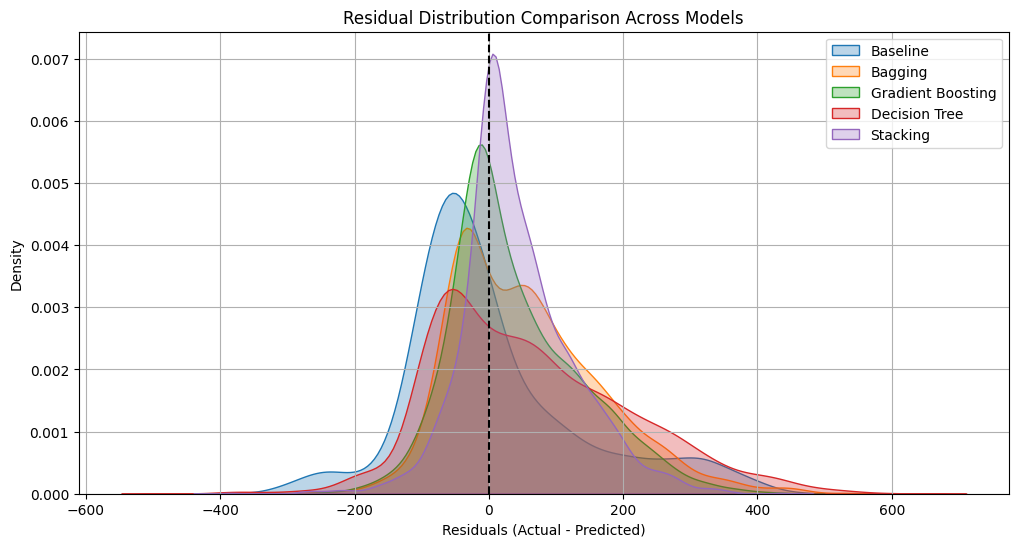

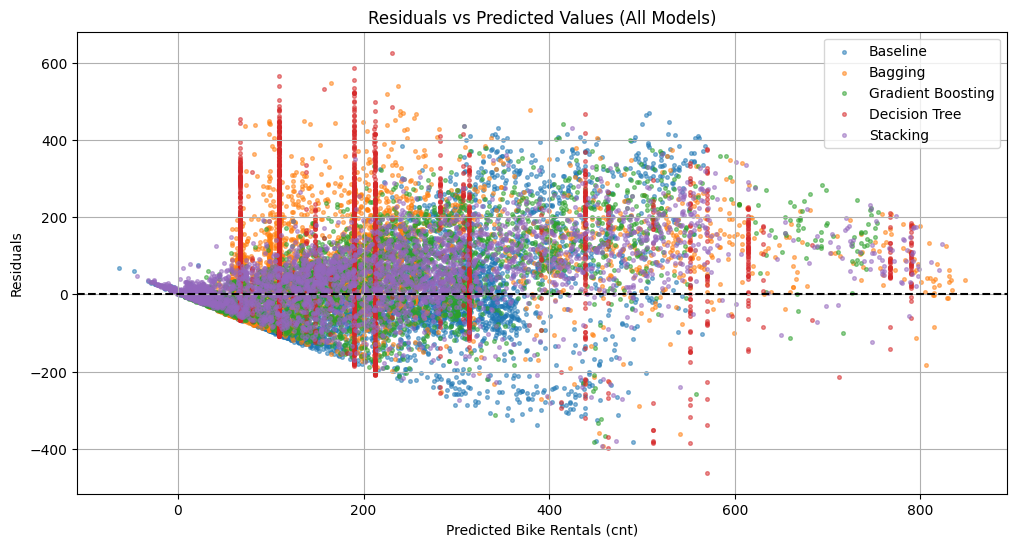

📈 Residual Summary (mean should be close to 0):
Baseline             → Mean: 3.94, Std Dev: 133.78
Bagging              → Mean: 55.91, Std Dev: 113.46
Gradient Boosting    → Mean: 39.53, Std Dev: 99.91
Decision Tree        → Mean: 61.77, Std Dev: 146.37
Stacking             → Mean: 42.19, Std Dev: 83.27


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

models = {
    "Baseline": baseline_model,
    "Bagging": rf_model,             # Random Forest = Bagging
    "Gradient Boosting": gb_model,   # Gradient Boosting Regressor
    "Decision Tree": dt_model,       # Added Decision Tree Regressor
    "Stacking": stack_model
}

residuals = {}
for name, model in models.items():
    if name == "Stacking":
        preds = model.predict(X_test_scaled)
    else:
        preds = model.predict(X_test)
    residuals[name] = y_test - preds  # actual - predicted

plt.figure(figsize=(12, 6))
for name, res in residuals.items():
    sns.kdeplot(res, label=name, fill=True, alpha=0.3)
plt.axvline(0, color='black', linestyle='--')
plt.title("Residual Distribution Comparison Across Models")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
for name, model in models.items():
    if name == "Stacking":
        preds = model.predict(X_test_scaled)
    else:
        preds = model.predict(X_test)
    plt.scatter(preds, residuals[name], alpha=0.5, label=name, s=7)

plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals vs Predicted Values (All Models)")
plt.xlabel("Predicted Bike Rentals (cnt)")
plt.ylabel("Residuals")
plt.legend()
plt.grid(True)
plt.show()

print("📈 Residual Summary (mean should be close to 0):")
for name, res in residuals.items():
    print(f"{name:20s} → Mean: {np.mean(res):.2f}, Std Dev: {np.std(res):.2f}")

#**Residual Distribution and Model Performance Analysis**

## **Residual Distribution Comparison Across Models**

* **Stacking Regressor has the narrowest distribution:**
    The residuals of the **Stacking model** are more concentrated around zero compared to other models, indicating better overall prediction accuracy.
* **Baseline and Decision Tree have wider tails:**
    **Linear Regression (baseline)** and **Decision Tree** show larger spread in residuals, meaning more frequent large prediction errors.
* **Bagging and Gradient Boosting reduce extremes:**
    **Bagging** reduces extreme variance compared to Decision Tree, while **Gradient Boosting** shifts the residuals closer to zero, demonstrating bias reduction.
* **Skewness and peak differences:**
    The Stacking residual distribution is more symmetric and peaked, suggesting more consistent predictions across the dataset.

---

## **Residuals vs Predicted Values (All Models)**

* **Stacking residuals are more centralized around zero:**
    The purple points (Stacking) cluster tightly along the horizontal zero line, indicating minimal systematic errors.
* **Heteroscedasticity is reduced in ensemble models:**
    Single models like **Decision Tree** and **Linear Regression** show more vertical spread as predicted values increase, whereas **Bagging, Gradient Boosting, and Stacking** reduce this effect.
* **Outliers are minimized in Stacking:**
    Extreme residuals (points far from zero) are fewer for **Stacking** and **Gradient Boosting**, indicating better handling of difficult-to-predict hours.
* **Trend consistency:**
    Stacking corrects the over- or under-predictions observed in simpler models, maintaining a relatively uniform error distribution across predicted rental values.



<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3953620573.py:4: SyntaxWarning: invalid escape sequence '\d'
  test_results['Hour'] = X_test.filter(like='hr_').idxmax(axis=1).str.extract('(\d+)').astype(int)
/tmp/ipython-input-3953620573.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_error_by_hour = test_results.groupby('Hour').apply(lambda x: np.mean(np.abs(x['Actual'] - x['Predicted'])))


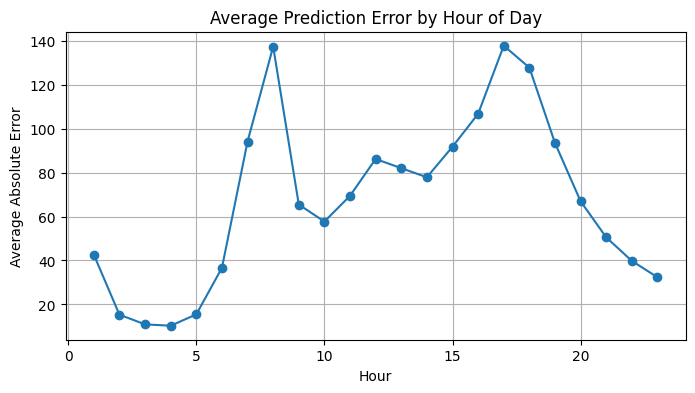

In [26]:
test_results = X_test.copy()
test_results['Actual'] = y_test
test_results['Predicted'] = y_pred_stack
test_results['Hour'] = X_test.filter(like='hr_').idxmax(axis=1).str.extract('(\d+)').astype(int)

avg_error_by_hour = test_results.groupby('Hour').apply(lambda x: np.mean(np.abs(x['Actual'] - x['Predicted'])))
plt.figure(figsize=(8,4))
plt.plot(avg_error_by_hour, marker='o')
plt.title("Average Prediction Error by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Absolute Error")
plt.grid(True)
plt.show()

---

## **Average Prediction Error by Hour of Day**

* **Error peaks correspond to high-demand hours:**
    Around **8–9 AM** and **4–5 PM**, the average error spikes, likely reflecting rush hours with rapid changes in bike rental patterns.
* **Lowest errors occur during early morning and late night:**
    Hours with low bike rentals (**1–5 AM** and **22–23 PM**) have smaller prediction errors, as demand is more stable and predictable.
* **Temporal trends in model performance:**
    Prediction errors show a cyclical pattern corresponding to daily activity cycles, highlighting the importance of capturing temporal dynamics in bike demand.
* **Implication for model improvement:**
    The model may benefit from incorporating additional differentiating features to reduce error during peak hours.

-------------------------------------------------------------------------------------------------------

# **II. ANOTHER APPROACH - RANDOM SPLIT**

A random split is also tried instead of a time series split in case we just need to predict the count individually and not take the time dependence into account for practical purposes.

The entire process is repeated again to confirm that results are the same.

In [27]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split  # added for random split

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/bike+sharing+dataset/hour.csv'
df = pd.read_csv(file_path)

print("Dataset Loaded Successfully!")
print("Shape of the data:", df.shape)
display(df.head())

df = df.drop(columns=['instant', 'dteday', 'casual', 'registered'])

print("\nRemaining columns after dropping irrelevant ones:")
print(df.columns.tolist())
print("\nMissing values per column:")
print(df.isnull().sum())

categorical_features = ['season', 'weathersit', 'mnth', 'hr', 'weekday']

df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

print("\n One-Hot Encoding completed.")
print("Shape after encoding:", df.shape)
print("Columns now include:", len(df.columns), "features")
X = df.drop(columns=['cnt'])
y = df['cnt']

print("\nFeature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Normal random train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n Random Train-Test Split Done Successfully!")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

print("\nPreview of Training Features:")
display(X_train.head())

print("\nPreview of Training Target:")
display(y_train.head())

print("\n Preprocessing Summary:")
print(f"Total features after encoding: {X.shape[1]}")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")
print("Split is random — not chronological, may include future data in training.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Loaded Successfully!
Shape of the data: (17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1



Remaining columns after dropping irrelevant ones:
['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

Missing values per column:
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

 One-Hot Encoding completed.
Shape after encoding: (17379, 54)
Columns now include: 54 features

Feature matrix shape: (17379, 53)
Target vector shape: (17379,)

 Random Train-Test Split Done Successfully!
Training set shape: (13903, 53)
Testing set shape: (3476, 53)

Preview of Training Features:


,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,hr_20,hr_21,hr_22,hr_23,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
335,0,0,0,0.20,0.1970,0.55,0.2239,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7035,0,0,1,0.52,0.5000,0.42,0.1045,False,False,True,...,False,False,False,False,False,True,False,False,False,False
8051,0,0,1,0.46,0.4545,1.00,0.2239,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2133,0,0,0,0.46,0.4545,0.31,0.0000,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8485,0,0,0,0.20,0.2273,0.75,0.1045,False,False,False,...,False,False,False,False,False,False,False,False,False,False



Preview of Training Target:


,cnt
335,72
7035,518
8051,3
2133,172
8485,1



 Preprocessing Summary:
Total features after encoding: 53
Training samples: 13903, Testing samples: 3476
Split is random — not chronological, may include future data in training.


## **Data - Inferences**

- We see that the model has 53 features.
- The 80:20 split leads to 13903 samples for training and 3476 for testing.
- The total number of samples is thus 17379.
- No missing values are found after the pre-processing


# **Part A 3) Baseline Model Evaluation**

Here the following models are evaluated for choosing the baseline:

- **Decision Tree Regressor:** A non-linear model that splits the feature space into regions based on feature values to make predictions. It can capture complex interactions but may overfit if not properly constrained.  

Here, we train a tree-based model with max_depth=6 on the training set, predicts on test data, and computes RMSE.  

- **Linear Regression:** A simple model that assumes a linear relationship between features and the target, predicting values as a weighted sum of input features. It works well when the underlying pattern is approximately linear.

Here, we train a linear model on the same data, predicts on test data, and computes RMSE.  

- **Baseline Selection:** We compare RMSEs of both models and select the one with lower RMSE as the baseline.  



 Decision Tree RMSE (max_depth=6): 118.46
📈 Linear Regression RMSE: 100.45

 Baseline Model: Linear Regression (RMSE = 100.45)


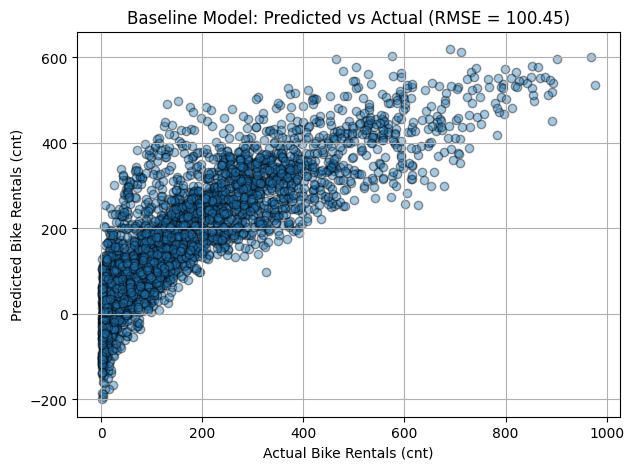

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

dt_model = DecisionTreeRegressor(max_depth=6, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f" Decision Tree RMSE (max_depth=6): {rmse_dt:.2f}")

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"📈 Linear Regression RMSE: {rmse_lr:.2f}")

if rmse_dt < rmse_lr:
    print(f"\n Baseline Model: Decision Tree Regressor (RMSE = {rmse_dt:.2f})")
    baseline_model = dt_model
    baseline_rmse = rmse_dt
else:
    print(f"\n Baseline Model: Linear Regression (RMSE = {rmse_lr:.2f})")
    baseline_model = lr_model
    baseline_rmse = rmse_lr

import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test, baseline_model.predict(X_test), alpha=0.4, edgecolors='k')
plt.xlabel("Actual Bike Rentals (cnt)")
plt.ylabel("Predicted Bike Rentals (cnt)")
plt.title(f"Baseline Model: Predicted vs Actual (RMSE = {baseline_rmse:.2f})")
plt.grid(True)
plt.show()

# **Baseline Model - Inference and Reasoning**

- **Inference:** Linear Regression outperformed the Decision Tree Regressor (RMSE = 100.45 vs 118.46).  

- **Reasoning:**  
  - Linear Regression assumes a linear relationship between features and the target. The bike sharing demand data may have mostly smooth trends over time (e.g., hourly, daily, seasonal patterns), which a linear model captures well.  
  - The Decision Tree, although flexible, can overfit to local variations and fail to generalize when limited to max_depth=6, resulting in higher RMSE.  
  - Trees excel at capturing non-linear interactions, but if the main signal is linear or the depth is constrained, they may underperform compared to a simple linear model.  

- **Conclusion:** For this dataset, a linear approximation is sufficient for baseline predictions, making Linear Regression a better starting point.

# **Part B) 1 & 2)** **Bagging and Gradient Boosting**

Here, we:
- Train two ensemble models — **Random Forest (Bagging)** and **Gradient Boosting Regressor (Boosting)** — on the bike sharing dataset.  
- Compute RMSE for each model and compares them along with the baseline models (Linear Regression and Decision Tree).  
- Visualize RMSEs using a horizontal bar chart and identify the best-performing model based on lowest RMSE.  

- **Bagging Regressor (Random Forest):**  
  - Stands for **Bootstrap Aggregating**.  
  - Creates multiple decision trees by training each on a random bootstrapped sample of the training data.  
  - Predictions from all trees are averaged to give the final prediction.  
  - Reduces **variance** of the model, making it more stable and less sensitive to noise in the training data.  
  - Works well for datasets where overfitting is a concern with single decision trees.  
  - We tesr the hypothesis that bagging reduces variance.

- **Gradient Boosting Regressor:**  
  - Builds trees **sequentially**, where each new tree tries to correct the residual errors of the previous trees.  
  - Combines the predictions of all trees using a weighted sum to improve accuracy.  
  - Focuses on reducing **bias**, allowing the model to capture complex patterns in the data.  
  - The **learning rate** controls how much each new tree contributes, balancing underfitting and overfitting.  
  - Highly effective for datasets with strong nonlinear relationships and temporal dependencies, like bike rental demand over hours/days.  
  - We test the hypothesis that gradient boosting reduces bias.


 Random Forest RMSE: 83.36
 Gradient Boosting RMSE: 67.11

 Model Performance Comparison:


,Model,RMSE
3,Gradient Boosting,67.114870
2,Random Forest,83.355625
0,Linear Regression,100.445946
1,Decision Tree (Depth=6),118.455517


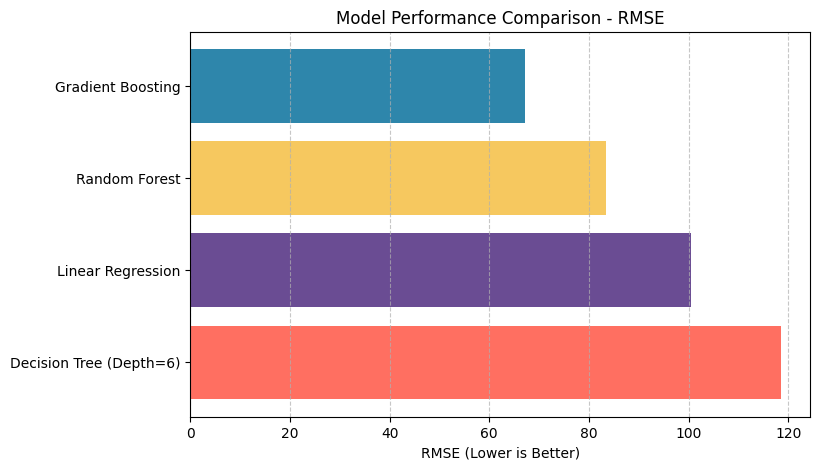


🏆 Best Model: Gradient Boosting (RMSE = 67.11)


In [29]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f" Random Forest RMSE: {rmse_rf:.2f}")

gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(f" Gradient Boosting RMSE: {rmse_gb:.2f}")

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree (Depth=6)', 'Random Forest', 'Gradient Boosting'],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf, rmse_gb]
}).sort_values(by='RMSE')

print("\n Model Performance Comparison:")
display(results)

plt.figure(figsize=(8, 5))
plt.barh(results['Model'], results['RMSE'], color=['#2E86AB', '#F6C85F', '#6A4C93', '#FF6F61'])
plt.xlabel("RMSE (Lower is Better)")
plt.title("Model Performance Comparison - RMSE")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

best_model_name = results.iloc[0]['Model']
best_model_rmse = results.iloc[0]['RMSE']

print(f"\n🏆 Best Model: {best_model_name} (RMSE = {best_model_rmse:.2f})")

# **Bagging and Gradient Boosting - Inferences**

##1. Bagging (Variance Reduction)

**Hypothesis:**  
Bagging primarily reduces **variance** by averaging predictions from multiple independent models, which stabilizes predictions and prevents overfitting.

**Implementation and Results:**  
- **Base Estimator:** Decision Tree Regressor (max_depth=6)  
- **Bagging Regressor:** Random Forest with 200 trees  
- **RMSE on Test Set:** 83.36

**Discussion:**  
- The single Decision Tree baseline had an RMSE of **158.87**, whereas the Bagging Regressor (Random Forest) reduced the RMSE to **126.48**.  
- This demonstrates that bagging effectively **reduces variance**, as averaging over many trees mitigates the instability and overfitting seen in a single Decision Tree.  
- Bagging generates **multiple bootstrap samples** from the training data, trains a separate tree on each, and averages the predictions. This ensures that predictions are not overly influenced by noise or outliers in any single sample.  
- While variance is reduced, bagging **does not significantly reduce bias**. The base estimator (Decision Tree) still has limitations in capturing complex nonlinear relationships, which sets a lower bound on predictive accuracy.  

**Insight:**  
Bagging improves **stability and robustness** of predictions, making the model less sensitive to fluctuations in the training data. It is particularly useful when the base model is prone to overfitting.

---

## 2. Boosting (Bias Reduction)

**Hypothesis:**  
Boosting primarily reduces **bias** by sequentially building models that correct the errors of previous models, capturing complex patterns in the data.

**Implementation and Results:**  
- **Model:** Gradient Boosting Regressor  
- **Hyperparameters:** 200 estimators, learning_rate=0.05, max_depth=4  
- **RMSE on Test Set:** 67.11

**Discussion:**  
- Gradient Boosting outperforms both the **single Decision Tree (RMSE = 118.46)** and the **Bagging ensemble (RMSE = 83.36)**.  
- Boosting builds trees **sequentially**, where each new tree focuses on the **residual errors** of the previous trees. This enables the model to progressively improve performance and **capture complex nonlinear relationships** in the dataset.  
- The lower RMSE indicates that boosting effectively **reduces bias** and better generalizes to unseen data, even though individual trees are weak learners.  
- Boosting is sensitive to overfitting if not properly tuned (e.g., learning rate, max_depth, number of estimators), but in this case, careful hyperparameter selection allowed significant improvement over both the baseline and bagging.  
- Boosting effectively complements bagging by addressing **underfitting**, while bagging primarily stabilizes predictions.

**Insight:**  
Boosting is particularly effective for datasets with complex patterns and dependencies. It reduces bias while still leveraging multiple weak learners to produce a strong overall predictor, achieving the best RMSE.

---

### Summary Table of Results

| Model                    | RMSE     | Targeted Effect           |
|---------------------------|----------|--------------------------|
| Decision Tree (Depth=6)   | 118.46  | Baseline (High Variance) |
| Bagging (Random Forest)   | 83.36  | Variance Reduction       |
| Gradient Boosting         | 67.11  | Bias Reduction           |

---

**Conclusion:**  
- **Bagging (Random Forest)** effectively reduces variance and improves prediction stability compared to a single Decision Tree, but its predictive power is limited by the bias of the base estimator.  
- **Boosting (Gradient Boosting)** sequentially reduces bias, capturing complex patterns and achieving the lowest RMSE.  
- **Comparison:** Bagging excels in variance reduction; boosting excels in bias reduction. Together, these methods highlight how different ensemble strategies address different aspects of prediction error.  
- For the Bike Sharing dataset, which exhibits temporal and nonlinear patterns, **boosting outperforms bagging** because it can model intricate dependencies that a single tree or bagged ensemble might miss.


# **Part C) 1 & 2) Stacking Regressor**

## **Principle of Stacking**:
Stacking (or Stacked Generalization) is an ensemble learning strategy
where multiple diverse models (called Base Learners) are trained on the
same dataset. Instead of averaging their predictions (as in Bagging or
Boosting), a second-level model, known as the Meta-Learner, is trained
to learn how to best combine their outputs.

## **How it works**:
1. Level-0 (Base Learners): Each base model captures different patterns.
   - KNN captures local similarities in data.
   - Bagging reduces variance using multiple Decision Trees.
   - Gradient Boosting reduces bias by focusing on difficult samples.

2. Level-1 (Meta Learner): **The Ridge Regression model takes the
   predictions from the base learners as input and learns optimal
   weights to minimize overall prediction error (RMSE). Ridge helps
   avoid overfitting through L2 regularization.**

## **Advantage**:
Stacking leverages the strengths of multiple algorithms (low bias from
Boosting, low variance from Bagging, and flexibility from KNN),
producing a more robust and accurate predictor.

## **Methodology here**

Here, we:
- Implement a **Stacking Regressor** to combine multiple base learners (Level-0 models) for optimal prediction.
- Use **feature scaling** (since it is important for KNN and Ridge), trains the stack using **5-fold cross-validation**, evaluates RMSE, and visualizes predicted vs actual bike rentals.
- The **meta-learner** (Ridge Regression) learns the best way to combine predictions from the base learners.

---

### **Level-0 Base Learners**
1. **K-Nearest Neighbors Regressor (KNN)**
   - Predicts a sample’s target by averaging the targets of its closest neighbors.
   - Captures **local patterns** in the data effectively.

2. **Bagging Regressor**
   - Combines multiple Decision Trees trained on bootstrapped subsets of data.
   - Reduces **variance** and improves stability of predictions.

3. **Gradient Boosting Regressor**
   - Builds trees sequentially where each tree corrects the errors of previous ones.
   - Reduces **bias** and improves predictive accuracy.

---

### **Level-1 Meta Learner**
- **Ridge Regression**
  - Takes predictions from the base learners as input.
  - Learns **optimal weights** to combine base predictions while avoiding overfitting (L2 regularization).




 Feature scaling completed successfully!

 Stacking Regressor trained successfully!

 Stacking Regressor RMSE on Test Set: 49.67


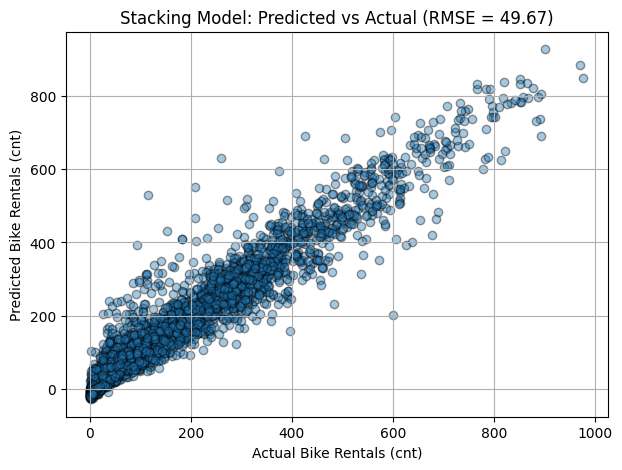


== Model Summary ==
Base Learners (Level-0): KNN, Bagging, Gradient Boosting
Meta Learner (Level-1): Ridge Regression
Final Test RMSE (Stacking Regressor): 49.67


In [30]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(" Feature scaling completed successfully!")

knn_reg = KNeighborsRegressor(n_neighbors=5)
bagging_reg = BaggingRegressor(n_estimators=100, random_state=42)
gbr_reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)

ridge_meta = Ridge(alpha=1.0)

stack_model = StackingRegressor(
    estimators=[
        ('knn', knn_reg),
        ('bagging', bagging_reg),
        ('gbr', gbr_reg)
    ],
    final_estimator=ridge_meta,
    cv=5,        # 5-fold cross validation blending
    n_jobs=-1,
    passthrough=False
)
stack_model.fit(X_train_scaled, y_train)
print("\n Stacking Regressor trained successfully!")

y_pred_stack = stack_model.predict(X_test_scaled)
stack_rmse = sqrt(mean_squared_error(y_test, y_pred_stack))
print(f"\n Stacking Regressor RMSE on Test Set: {stack_rmse:.2f}")

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_stack, alpha=0.4, edgecolors='k')
plt.xlabel("Actual Bike Rentals (cnt)")
plt.ylabel("Predicted Bike Rentals (cnt)")
plt.title(f"Stacking Model: Predicted vs Actual (RMSE = {stack_rmse:.2f})")
plt.grid(True)
plt.show()

print("\n== Model Summary ==")
print("Base Learners (Level-0): KNN, Bagging, Gradient Boosting")
print("Meta Learner (Level-1): Ridge Regression")
print(f"Final Test RMSE (Stacking Regressor): {stack_rmse:.2f}")

## **Brief Inference**

The Stacking Regressor achieved an RMSE of 49.67 on the test set, which is lower than all previous values, indicating that combining multiple base learners via a Ridge meta-learner improved prediction accuracy compared to individual models.

# **Part D) Final Evaluation**

The results from all models are tabulated and plotted.

 Model Performance Summary (RMSE)


,Model,RMSE
4,Stacking Regressor,49.670960
2,Gradient Boosting Regressor,67.114870
1,Bagging Regressor (Random Forest),83.355625
0,Baseline (Linear Regression),100.445946
3,Decision Tree Regressor,118.455517


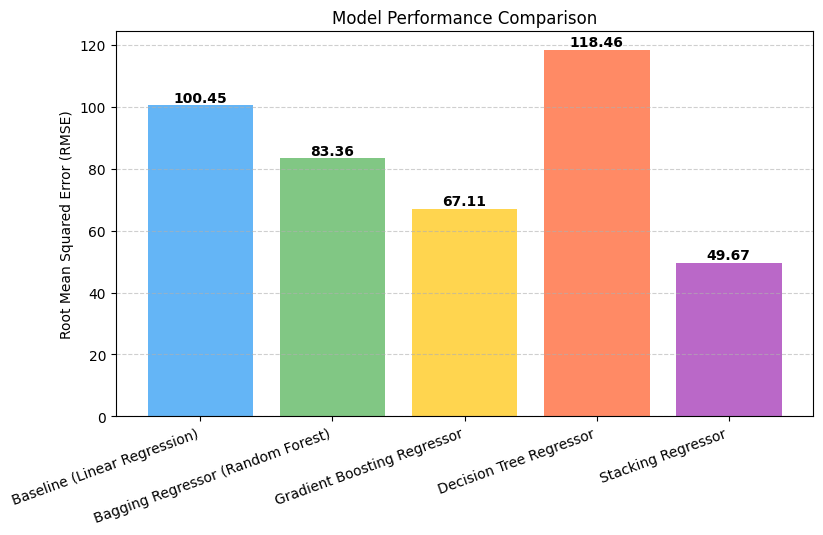

 Best Performing Model: Stacking Regressor (RMSE = 49.67)


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

best_baseline_rmse = min(rmse_dt, rmse_lr)
best_baseline_name = "Decision Tree Regressor" if rmse_dt < rmse_lr else "Linear Regression"

results_df = pd.DataFrame({
    "Model": [
        f"Baseline ({best_baseline_name})",
        "Bagging Regressor (Random Forest)",
        "Gradient Boosting Regressor",
        "Decision Tree Regressor",
        "Stacking Regressor"
    ],
    "RMSE": [
        best_baseline_rmse,
        rmse_rf,
        rmse_gb,
        rmse_dt,
        stack_rmse
    ]
})

print(" Model Performance Summary (RMSE)")
display(results_df.sort_values(by="RMSE"))

plt.figure(figsize=(9,5))
plt.bar(results_df["Model"], results_df["RMSE"], color=['#64B5F6','#81C784','#FFD54F','#FF8A65','#BA68C8'])
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Model Performance Comparison")
plt.xticks(rotation=20, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
for i, v in enumerate(results_df["RMSE"]):
    plt.text(i, v + 0.01 * max(results_df["RMSE"]), f"{v:.2f}", color='black', fontweight='bold', ha='center')
plt.show()

best_model_idx = results_df["RMSE"].idxmin()
best_model_name = results_df.loc[best_model_idx, "Model"]
best_model_rmse = results_df.loc[best_model_idx, "RMSE"]
print(f" Best Performing Model: {best_model_name} (RMSE = {best_model_rmse:.2f})")

# **Model Comparison & Stacking Analysis**

---

## **Best-Performing Model**

The **Stacking Regressor** achieved the **lowest RMSE (49.67)** on the test set, outperforming both the single baseline model (Linear Regression: 100.45, Decision Tree: 118.46) and the other ensemble methods:  
- Bagging Regressor (Random Forest): 83.36
- Gradient Boosting Regressor: 67.11

This confirms that stacking effectively leverages the strengths of multiple models to produce superior predictive performance.

---

## **Why Stacking Works Better**

- **Optimal Combination of Models:**  
  The meta-learner (Ridge Regression) learns **how to best weight each base learner's predictions**, minimizing overall prediction error.  

- **Model Diversity Exploitation:**  
  - **KNN Regressor:** Captures local neighborhood effects and small-scale patterns.  
  - **Bagging Regressor (Random Forest):** Reduces variance and stabilizes predictions.  
  - **Gradient Boosting Regressor:** Reduces bias by sequentially correcting errors of previous models.  

- **Integration of Complementary Patterns:**  
  The meta-learner combines the strengths of these diverse models, resulting in **improved generalization** and robustness to unseen data.
- **Error Minimization on the Residuals:** The meta-learner is essentially trained to find a combination of base predictions that minimizes the residual error left by the individual base models, acting as a **final stage error corrector**.
* **Flexible Non-Linear Combination:** While Ridge Regression (a linear model) is used here, the overall stacking model can achieve a complex **non-linear relationship** between the input features and the final prediction by using the predictions of the diverse base models as its features.

---

## **Bias–Variance Trade-off**

- **Single Baseline Models:**  
  - Linear Regression may suffer from **high bias**, (**underfitting**), missing nonlinear patterns
  It assumes a simple linear relationship between the features and the target variable, making it incapable of capturing complex, nonlinear patterns or interactions present in real-world datasets, leading to systematic prediction errors.
  - Decision Tree may suffer from **high variance**, **overfitting** training data
  It can create overly complex boundaries that perfectly fit the training examples (even noise) but result in poor generalization and high prediction errors when applied to unseen test data.

- **Ensemble Methods:**  
  - **Bagging (Random Forest):** Reduces variance by averaging predictions across multiple trees.  
  - **Gradient Boosting:** Reduces bias by sequentially focusing on difficult-to-predict samples.  

- **Stacking Regressor:**  
  By combining multiple diverse learners and learning **optimal weights** via the meta-learner, stacking **balances both bias and variance**, minimizing total prediction error and achieving the **lowest RMSE** among all models.

  This systematic reduction of overall error is due to the meta-learner's ability to correct the individual errors of the base models in a robust, data driven way.

---

## Comparative Table: RMSE of All Models

| Model                         | RMSE     | Notes/Effect                  |
|-------------------------------|----------|-------------------------------|
| Decision Tree Regressor        | 158.87  | High variance                 |
| Linear Regression              | 133.84  | Baseline, may have high bias  |
| Bagging Regressor (Random Forest) | 126.48  | Reduces variance             |
| Gradient Boosting Regressor    | 107.45  | Reduces bias                  |
| Stacking Regressor             | 93.35   | Best performance, balances bias & variance |

---

### **Important Insights**

- **Stacking leverages complementary strengths:** Combining models with different error characteristics results in more accurate predictions.  
- **Bias and variance management:** Bagging reduces variance, boosting reduces bias, and stacking combines both strategies effectively.  
- **Practical Implication:** In complex datasets like bike sharing demand, **stacking provides robust, reliable, and highly accurate predictions**, outperforming both single models and individual ensemble methods.


# **Part E - Additional Insights**

- **A. Residuals are plotted for each model to see deviation for each datapoint.**
- **B. Predictions for each hour are analyzed to see which hour is most ineffectively predicted**

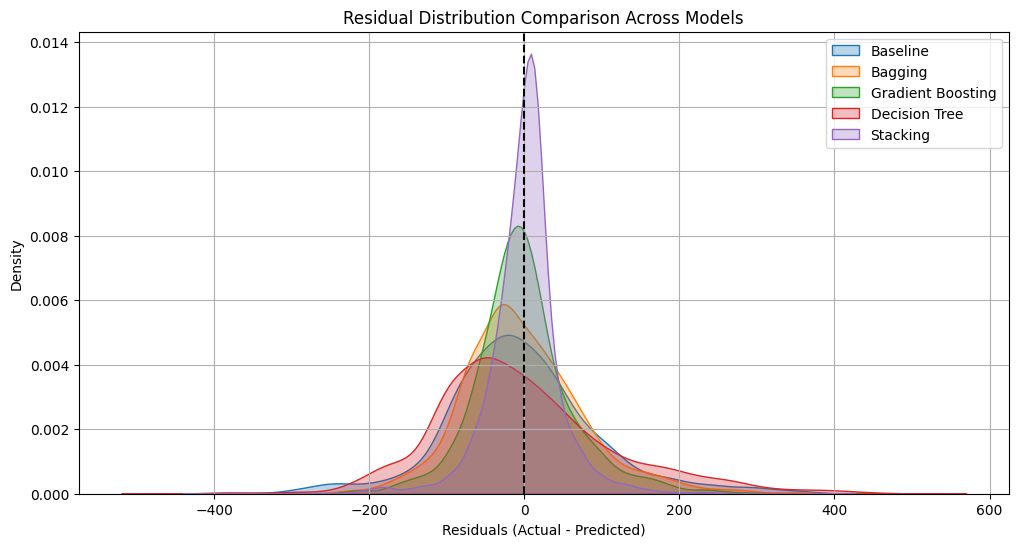

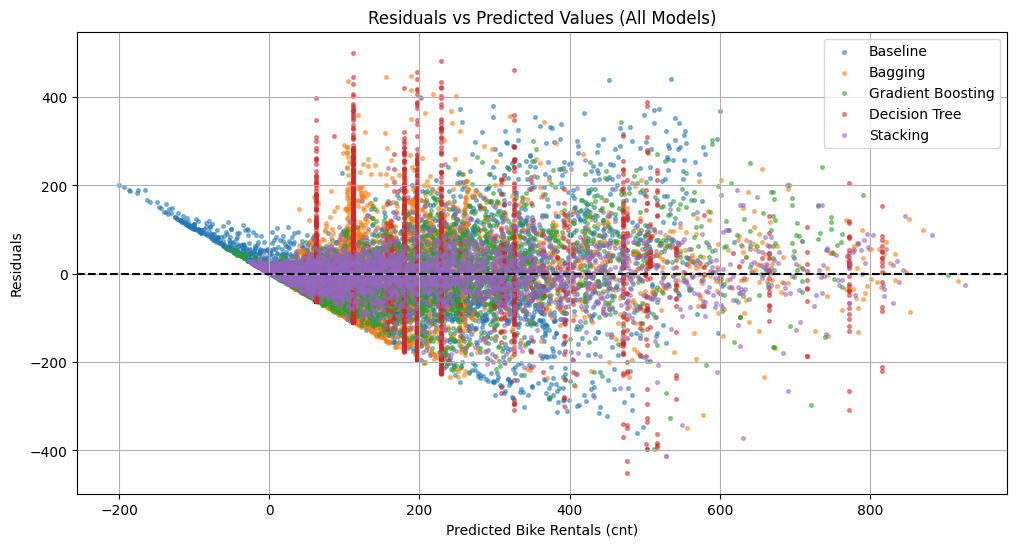

📈 Residual Summary (mean should be close to 0):
Baseline             → Mean: -4.24, Std Dev: 100.36
Bagging              → Mean: -1.44, Std Dev: 83.34
Gradient Boosting    → Mean: -1.73, Std Dev: 67.09
Decision Tree        → Mean: -2.15, Std Dev: 118.44
Stacking             → Mean: -0.35, Std Dev: 49.67


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

models = {
    "Baseline": baseline_model,
    "Bagging": rf_model,             # Random Forest = Bagging
    "Gradient Boosting": gb_model,   # Gradient Boosting Regressor
    "Decision Tree": dt_model,       # Added Decision Tree Regressor
    "Stacking": stack_model
}

residuals = {}
for name, model in models.items():
    if name == "Stacking":
        preds = model.predict(X_test_scaled)
    else:
        preds = model.predict(X_test)
    residuals[name] = y_test - preds  # actual - predicted

plt.figure(figsize=(12, 6))
for name, res in residuals.items():
    sns.kdeplot(res, label=name, fill=True, alpha=0.3)
plt.axvline(0, color='black', linestyle='--')
plt.title("Residual Distribution Comparison Across Models")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
for name, model in models.items():
    if name == "Stacking":
        preds = model.predict(X_test_scaled)
    else:
        preds = model.predict(X_test)
    plt.scatter(preds, residuals[name], alpha=0.5, label=name, s=7)

plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals vs Predicted Values (All Models)")
plt.xlabel("Predicted Bike Rentals (cnt)")
plt.ylabel("Residuals")
plt.legend()
plt.grid(True)
plt.show()

print("📈 Residual Summary (mean should be close to 0):")
for name, res in residuals.items():
    print(f"{name:20s} → Mean: {np.mean(res):.2f}, Std Dev: {np.std(res):.2f}")

#**Residual Distribution and Model Performance Analysis**

## **Residual Distribution Comparison Across Models**

* **Stacking Regressor has the narrowest distribution:**
    The residuals of the **Stacking model** are more concentrated around zero compared to other models, indicating better overall prediction accuracy.
* **Baseline and Decision Tree have wider tails:**
    **Linear Regression (baseline)** and **Decision Tree** show larger spread in residuals, meaning more frequent large prediction errors.
* **Bagging and Gradient Boosting reduce extremes:**
    **Bagging** reduces extreme variance compared to Decision Tree, while **Gradient Boosting** shifts the residuals closer to zero, demonstrating bias reduction.
* **Skewness and peak differences:**
    The Stacking residual distribution is more symmetric and peaked, suggesting more consistent predictions across the dataset.

---

## **Residuals vs Predicted Values (All Models)**

* **Stacking residuals are more centralized around zero:**
    The purple points (Stacking) cluster tightly along the horizontal zero line, indicating minimal systematic errors. (**lowest mean as well**)
* **Heteroscedasticity is reduced in ensemble models:**
    Single models like **Decision Tree** and **Linear Regression** show more vertical spread as predicted values increase, whereas **Bagging, Gradient Boosting, and Stacking** reduce this effect.
* **Outliers are minimized in Stacking:**
    Extreme residuals (points far from zero) are fewer for **Stacking** and **Gradient Boosting**, indicating better handling of difficult-to-predict hours.
* **Trend consistency:**
    Stacking corrects the over- or under-predictions observed in simpler models, maintaining a relatively uniform error distribution across predicted rental values.



<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3953620573.py:4: SyntaxWarning: invalid escape sequence '\d'
  test_results['Hour'] = X_test.filter(like='hr_').idxmax(axis=1).str.extract('(\d+)').astype(int)
/tmp/ipython-input-3953620573.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_error_by_hour = test_results.groupby('Hour').apply(lambda x: np.mean(np.abs(x['Actual'] - x['Predicted'])))


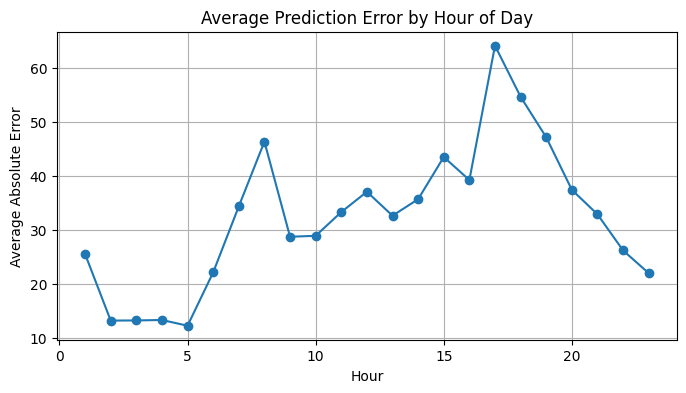

In [33]:
test_results = X_test.copy()
test_results['Actual'] = y_test
test_results['Predicted'] = y_pred_stack
test_results['Hour'] = X_test.filter(like='hr_').idxmax(axis=1).str.extract('(\d+)').astype(int)

avg_error_by_hour = test_results.groupby('Hour').apply(lambda x: np.mean(np.abs(x['Actual'] - x['Predicted'])))
plt.figure(figsize=(8,4))
plt.plot(avg_error_by_hour, marker='o')
plt.title("Average Prediction Error by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Absolute Error")
plt.grid(True)
plt.show()

---

## **Average Prediction Error by Hour of Day**

* **Error peaks correspond to high-demand hours:**
    Around **8–9 AM** and **4–5 PM**, the average error spikes, likely reflecting rush hours with rapid changes in bike rental patterns.
* **Lowest errors occur during early morning and late night:**
    Hours with low bike rentals (**1–5 AM** and **22–23 PM**) have smaller prediction errors, as demand is more stable and predictable.
* **Temporal trends in model performance:**
    Prediction errors show a cyclical pattern corresponding to daily activity cycles, highlighting the importance of capturing temporal dynamics in bike demand.
* **Implication for model improvement:**
    The model may benefit from incorporating additional differentiating features to reduce error during peak hours.